## Objective: separate ranking to view the word cloud
## Date: 2/9/2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
import plotly.express as px

### Import all the data 

In [2]:
# data importing 
lowes_6026 = pd.read_csv('C:\\Users\\lxf12\\Desktop\\Folder of folders\\Corona New project\\Lowes_Homedepot_Reviews\\lowes.com_3286026.csv')
lowes_0314 = pd.read_csv('C:\\Users\\lxf12\\Desktop\\Folder of folders\\Corona New project\\Lowes_Homedepot_Reviews\\lowes.com_3380314.csv')
lowes_0511 = pd.read_csv('C:\\Users\\lxf12\\Desktop\\Folder of folders\\Corona New project\\Lowes_Homedepot_Reviews\\lowes.com_50280511.csv') 
lowes_6162 = pd.read_csv('C:\\Users\\lxf12\\Desktop\\Folder of folders\\Corona New project\\Lowes_Homedepot_Reviews\\lowes.com_1003066162.csv')
lowes_6209 = pd.read_csv('C:\\Users\\lxf12\\Desktop\\Folder of folders\\Corona New project\\Lowes_Homedepot_Reviews\\lowes.com_5000026209.csv')
lowes_9855 = pd.read_csv('C:\\Users\\lxf12\\Desktop\\Folder of folders\\Corona New project\\Lowes_Homedepot_Reviews\\lowes.com_5001899855.csv')

In [3]:
# data importing 
homedepot_4796 = pd.read_csv('C:\\Users\\lxf12\\Desktop\\Folder of folders\\Corona New project\\Lowes_Homedepot_Reviews\\homedepot.com_204074796.csv')
homedepot_7071 = pd.read_csv('C:\\Users\\lxf12\\Desktop\\Folder of folders\\Corona New project\\Lowes_Homedepot_Reviews\\homedepot.com_319247071.csv')

### Glimpse the data 

In [4]:
# set display option to max to see all information in review column
pd.set_option('display.max_colwidth', -1)

C:\Users\lxf12\AppData\Local\Temp\ipykernel_30308\779606820.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
homedepot_4796.head(2)

,Market_place,URL,Product_name,SKU,Price,Currency,Subject,Author,Date,Review,Stars
0,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piece-1-28-GPF-High-Efficiency-Single-Flush-Elongated-Toilet-in-White-N2428E/204074796,2-Piece 1.28 GPF High Efficiency Single Flush Elongated Toilet in White,686826,119.0,USD,Tiny pool of water in the bowl.,GreatAim,"Nov 22, 2022","I purchased 4 of these toilets for my new house. The pool of water in the bowl of 3 of them is very small, often resulting in solid waste being smeared well above the water line, where flushing will not easily remove it! One of the four toilets does have a ""normal sized"" pool of water. It is clear that it was not manufactured along with the other 3, it has different printing in the tank, despite having the same SKU number. I have included photos of both variations and their markings.",1
1,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piece-1-28-GPF-High-Efficiency-Single-Flush-Elongated-Toilet-in-White-N2428E/204074796,2-Piece 1.28 GPF High Efficiency Single Flush Elongated Toilet in White,686826,119.0,USD,Cheap seat and lid,Dee2,"Sep 26, 2022","I recently bought the chair height, elongated toilet. This is the second one I bought, as I have one in my other bathroom I bought about 4 years ago. Since I didn’t have any issues with the first one I purchased another. Bad decision. The quality has really declined, cheap, flimsy seating and lid that will not stay connected, does not line up. Very disappointed ☹️ I guess this is why the toilets are displayed so high so you cannot check them out before you buy!",2


### For negative rankings (1,2,3 stars)

In [6]:
# get reviews that have given 1, 2, and 3 stars (negative)
lowes_6026_negative = lowes_6026.loc[lowes_6026['Stars'] <= 3, ['Review', 'Stars']]
lowes_0314_negative = lowes_0314.loc[lowes_0314['Stars'] <= 3, ['Review', 'Stars']]
lowes_0511_negative = lowes_0511.loc[lowes_0511['Stars'] <= 3, ['Review', 'Stars']]
lowes_6162_negative = lowes_6162.loc[lowes_6162['Stars'] <= 3, ['Review', 'Stars']]
lowes_6209_negative = lowes_6209.loc[lowes_6209['Stars'] <= 3, ['Review', 'Stars']]
lowes_9855_negative = lowes_9855.loc[lowes_6026['Stars'] <= 3, ['Review', 'Stars']]

In [7]:
# get reviews that have given 1, 2, and 3 stars (negative)
homedepot_4796_negative = homedepot_4796.loc[homedepot_4796['Stars'] <= 3, ['Review', 'Stars']]
homedepot_7071_negative = homedepot_7071.loc[homedepot_7071['Stars'] <= 3, ['Review', 'Stars']]

In [8]:
# drop null value
negative_datalist = [lowes_6026_negative, lowes_0314_negative, lowes_0511_negative, lowes_6162_negative,
                    lowes_6209_negative, lowes_9855_negative, homedepot_4796_negative, homedepot_7071_negative]

for i in negative_datalist:
    # drop rows with Not a Number (NaN) and None values
    print('null rows amount: '+ str(i['Review'].isna().sum()))
    i = i['Review'].dropna()
    #print('after cleaning, null rows amount: '+ str(i['Review'].isna().sum()))

null rows amount: 7
null rows amount: 1
null rows amount: 6
null rows amount: 25
null rows amount: 5
null rows amount: 48
null rows amount: 10
null rows amount: 0


In [9]:
# # transforming the dataframe to strings 
# for i in negative_datalist:
#     # cast pandas series into string
#     i = i['Review'].to_string(index=False)
#     print(type(i))

In [10]:
lowes_6026_negative = lowes_6026_negative['Review'].to_string(index=False)
lowes_0314_negative = lowes_0314_negative['Review'].to_string(index=False)
lowes_0511_negative = lowes_0511_negative['Review'].to_string(index=False)
lowes_6162_negative = lowes_6162_negative['Review'].to_string(index=False)
lowes_6209_negative = lowes_6209_negative['Review'].to_string(index=False)
lowes_9855_negative = lowes_9855_negative['Review'].to_string(index=False)
homedepot_4796_negative = homedepot_4796_negative['Review'].to_string(index=False)
homedepot_7071_negative = homedepot_7071_negative['Review'].to_string(index=False)

In [11]:
type(lowes_6026_negative)

str

In [12]:
# the function defined by Anuar to get all adjectives 
def get_adj(text):
    # load english stop words 
    stop_words = set(stopwords.words('english'))
    # customize stop_words by including a custom list of words
    custom_stop_words = ['new','toilet', 'factory', 'flush', 'sku', 'photos', 'stay', 
                                     'lid', 'good', 'great', 'handle', 'top', 'high', 'urine']
    stop_words.update(custom_stop_words)
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    # tokenize the text
    tokens = nltk.word_tokenize(text)
    # remove stop words
    tokens = [token for token in tokens if token.lower() not in stop_words and token.isalpha()]
#     tokens = [word for word in tokens if word not in stop_words and word.isalpha()] 
    # tag each token with its part of speech
    tagged_tokens = pos_tag(tokens)
    # lemmatize each token based on its part of speech tag and select only the words that have been tagged as adjectives
    lemmatized_adjectives = [lemmatizer.lemmatize(token, pos='a') for token, tag in tagged_tokens if tag[0:1].lower() == 'j']
    return lemmatized_adjectives

In [13]:
 def freq_chart(text):
    # apply the adjective function
    adjectives = get_adj(text)
    
    # transfer the frequency data to a new dataframe
    word_frequency = FreqDist(adjectives)
    
    # chart to show the frequency 
    word_frequency.plot(30,cumulative=False)
    plt.show()

In [14]:
def word_cloud(text):
    # apply the adjective function
    adjectives = get_adj(text)
    
    # transfer the frequency data to a new dataframe
    word_frequency = FreqDist(adjectives)
    # word cloud to show the frequency 
    # generate wordcloud
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(" ".join(word_frequency))

    # plot wordcloud using Plotly
    fig = px.imshow(wordcloud)
    fig.update_layout(title="Wordcloud for reviews")
    fig.show()

please input your data name: lowes_6162_negative


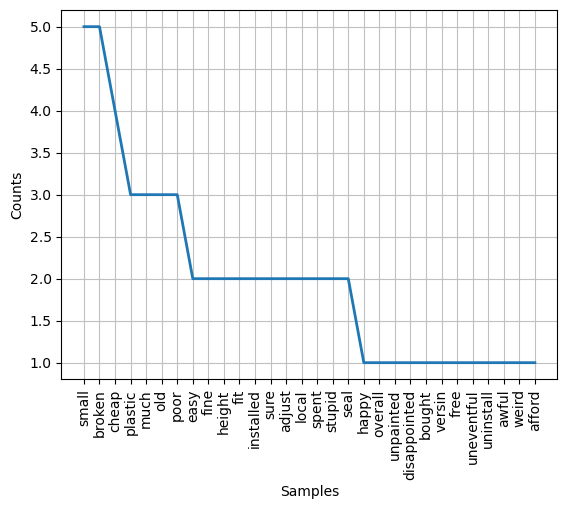


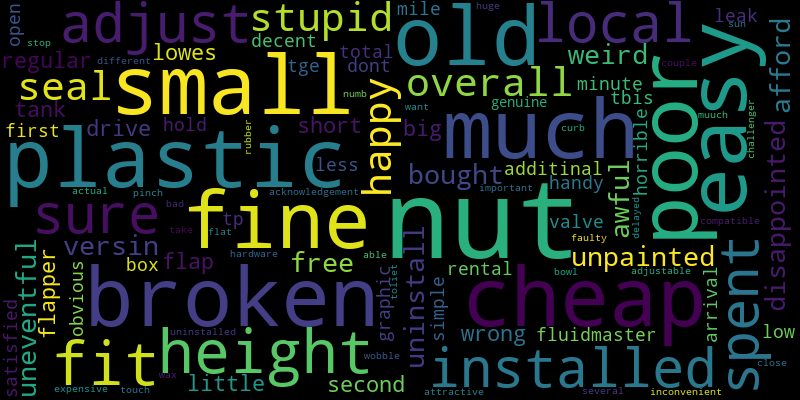

In [32]:
# output the charts and the wordcloud after input the dataname
df_dict = {'lowes_6026_negative': lowes_6026_negative, 'lowes_0314_negative': lowes_0314_negative, 
           'lowes_0511_negative': lowes_0511_negative, 'lowes_6162_negative': lowes_6162_negative,
          'lowes_6209_negative': lowes_6209_negative, 'lowes_9855_negative': lowes_9855_negative,
          'homedepot_4796_negative': homedepot_4796_negative, 'homedepot_7071_negative': homedepot_7071_negative}

dataname = input('please input your data name: ')

selected_df = df_dict.get(dataname)

if selected_df is not None:
    freq_chart(selected_df)
    word_cloud(selected_df)
else:
    print("Invalid input. Please enter the name correctly.")

### For positive rankings (4,5 stars)

In [16]:
# get reviews that have given 4, 5 stars (negative)
lowes_6026_positive = lowes_6026.loc[lowes_6026['Stars'] > 3, ['Review', 'Stars']]
lowes_0314_positive = lowes_0314.loc[lowes_0314['Stars'] > 3, ['Review', 'Stars']]
lowes_0511_positive = lowes_0511.loc[lowes_0511['Stars'] > 3, ['Review', 'Stars']]
lowes_6162_positive = lowes_6162.loc[lowes_6162['Stars'] > 3, ['Review', 'Stars']]
lowes_6209_positive = lowes_6209.loc[lowes_6209['Stars'] > 3, ['Review', 'Stars']]
lowes_9855_positive = lowes_9855.loc[lowes_6026['Stars'] > 3, ['Review', 'Stars']]

In [17]:
# get reviews that have given 1, 2, and 3 stars (negative)
homedepot_4796_positive = homedepot_4796.loc[homedepot_4796['Stars'] > 3, ['Review', 'Stars']]
homedepot_7071_positive = homedepot_7071.loc[homedepot_7071['Stars'] > 3, ['Review', 'Stars']]

In [18]:
# drop null value
positive_datalist = [lowes_6026_positive, lowes_0314_positive, lowes_0511_positive, lowes_6162_positive,
                    lowes_6209_positive, lowes_9855_positive, homedepot_4796_positive, homedepot_7071_positive]

for i in positive_datalist:
    # drop rows with Not a Number (NaN) and None values
    print('null rows amount: '+ str(i['Review'].isna().sum()))
    i = i['Review'].dropna()
    #print('after cleaning, null rows amount: '+ str(i['Review'].isna().sum()))

null rows amount: 23
null rows amount: 9
null rows amount: 9
null rows amount: 272
null rows amount: 71
null rows amount: 122
null rows amount: 176
null rows amount: 9


In [19]:
lowes_6026_positive = lowes_6026_positive['Review'].to_string(index=False)
lowes_0314_positive = lowes_0314_positive['Review'].to_string(index=False)
lowes_0511_positive = lowes_0511_positive['Review'].to_string(index=False)
lowes_6162_positive = lowes_6162_positive['Review'].to_string(index=False)
lowes_6209_positive = lowes_6209_positive['Review'].to_string(index=False)
lowes_9855_positive = lowes_9855_positive['Review'].to_string(index=False)
homedepot_4796_positive = homedepot_4796_positive['Review'].to_string(index=False)
homedepot_7071_positive = homedepot_7071_positive['Review'].to_string(index=False)

please input your data name: lowes_6162_positive


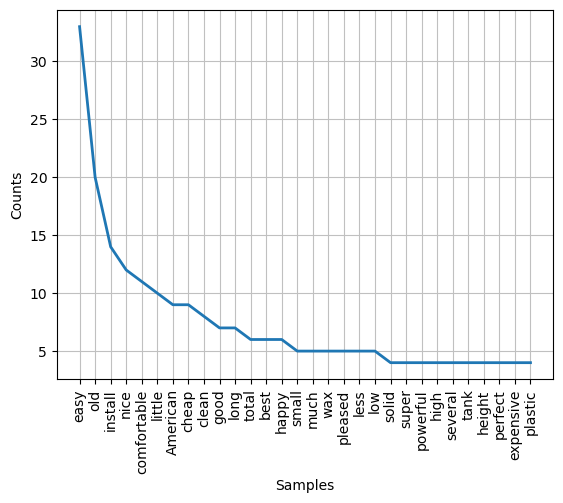


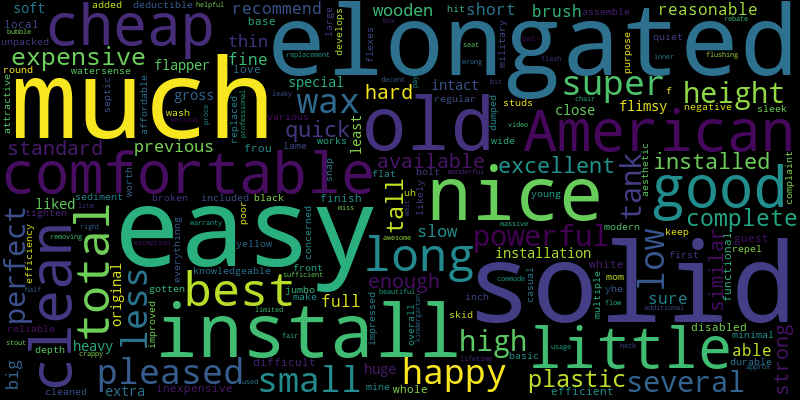

In [33]:
# output the charts and the wordcloud after input the dataname
df_dict = {'lowes_6026_positive': lowes_6026_positive, 'lowes_0314_positive': lowes_0314_positive, 
           'lowes_0511_positive': lowes_0511_positive, 'lowes_6162_positive': lowes_6162_positive,
          'lowes_6209_positive': lowes_6209_positive, 'lowes_9855_positive': lowes_9855_positive,
          'homedepot_4796_positive': homedepot_4796_positive, 'homedepot_7071_positive': homedepot_7071_positive}

dataname = input('please input your data name: ')

selected_df = df_dict.get(dataname)

if selected_df is not None:
    freq_chart(selected_df)
    word_cloud(selected_df)
else:
    print("Invalid input. Please enter the name correctly.")

In [21]:
# # apply the adjective function
# adjectives = get_adj(lowes_6026_negative)
# # print("Adjectives in the text: ", adjectives)

In [22]:
# # transfer the frequency data to a new dataframe
# word_frequency = FreqDist(adjectives)
# # print(adjectives)

In [23]:
# # chart to show the frequency 
# word_frequency.plot(30,cumulative=False)
# plt.show()

In [24]:
# # word cloud to show the frequency 
# # generate wordcloud
# wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(" ".join(word_frequency))

# # plot wordcloud using Plotly
# fig = px.imshow(wordcloud)
# fig.update_layout(title="Wordcloud for reviews rated 1,2, and 3 stars")
# fig.show()